## Using a pretrained network with training sample of 5000, a validation sample of 500, and a test sample of 500

### Downloading the data

In [1]:
#!unzip -qq '/fs/ess/PGS0333/BA_64061_KSU/data/dogs-vs-cats.zip'

In [2]:
#!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [3]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=4999)
make_subset("validation", start_index=5000, end_index=5499)
make_subset("test", start_index=5500, end_index=5999)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [4]:
"""
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
"""

'\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\ninputs = keras.Input(shape=(180, 180, 3))\nx = layers.Rescaling(1./255)(inputs)\nx = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)\nx = layers.MaxPooling2D(pool_size=2)(x)\nx = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)\nx = layers.MaxPooling2D(pool_size=2)(x)\nx = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)\nx = layers.MaxPooling2D(pool_size=2)(x)\nx = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)\nx = layers.MaxPooling2D(pool_size=2)(x)\nx = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)\nx = layers.Flatten()(x)\noutputs = layers.Dense(1, activation="sigmoid")(x)\nmodel = keras.Model(inputs=inputs, outputs=outputs)\n'

In [5]:
# model.summary()

**Configuring the model for training**

In [6]:
"""
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
"""

'\nmodel.compile(loss="binary_crossentropy",\n              optimizer="rmsprop",\n              metrics=["accuracy"])\n'

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 9998 files belonging to 2 classes.
Found 998 files belonging to 2 classes.
Found 998 files belonging to 2 classes.


In [8]:
"""
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
"""

'\nimport numpy as np\nimport tensorflow as tf\nrandom_numbers = np.random.normal(size=(1000, 16))\ndataset = tf.data.Dataset.from_tensor_slices(random_numbers)\n'

In [9]:
"""
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break
"""

'\nfor i, element in enumerate(dataset):\n    print(element.shape)\n    if i >= 2:\n        break\n'

In [10]:
"""
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break
"""

'\nbatched_dataset = dataset.batch(32)\nfor i, element in enumerate(batched_dataset):\n    print(element.shape)\n    if i >= 2:\n        break\n'

In [11]:
"""
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break
"""

'\nreshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))\nfor i, element in enumerate(reshaped_dataset):\n    print(element.shape)\n    if i >= 2:\n        break\n'

**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [12]:
"""
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
"""

'\nfor data_batch, labels_batch in train_dataset:\n    print("data batch shape:", data_batch.shape)\n    print("labels batch shape:", labels_batch.shape)\n    break\n'

**Fitting the model using a `Dataset`**

In [13]:
"""
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)
"""

'\ncallbacks = [\n    keras.callbacks.ModelCheckpoint(\n        filepath="convnet_from_scratch.keras",\n        save_best_only=True,\n        monitor="val_loss")\n]\nhistory = model.fit(\n    train_dataset,\n    epochs=30,\n    validation_data=validation_dataset,\n    callbacks=callbacks)\n'

**Displaying curves of loss and accuracy during training**

In [14]:
"""
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
"""

'\nimport matplotlib.pyplot as plt\naccuracy = history.history["accuracy"]\nval_accuracy = history.history["val_accuracy"]\nloss = history.history["loss"]\nval_loss = history.history["val_loss"]\nepochs = range(1, len(accuracy) + 1)\nplt.plot(epochs, accuracy, "bo", label="Training accuracy")\nplt.plot(epochs, val_accuracy, "b", label="Validation accuracy")\nplt.title("Training and validation accuracy")\nplt.legend()\nplt.figure()\nplt.plot(epochs, loss, "bo", label="Training loss")\nplt.plot(epochs, val_loss, "b", label="Validation loss")\nplt.title("Training and validation loss")\nplt.legend()\nplt.show()\n'

**Evaluating the model on the test set**

In [15]:
"""
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
"""

'\ntest_model = keras.models.load_model("convnet_from_scratch.keras")\ntest_loss, test_acc = test_model.evaluate(test_dataset)\nprint(f"Test accuracy: {test_acc:.3f}")\n'

### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [16]:
"""
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
"""

'\ndata_augmentation = keras.Sequential(\n    [\n        layers.RandomFlip("horizontal"),\n        layers.RandomRotation(0.1),\n        layers.RandomZoom(0.2),\n    ]\n)\n'

**Displaying some randomly augmented training images**

In [17]:
"""
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
"""

'\nplt.figure(figsize=(10, 10))\nfor images, _ in train_dataset.take(1):\n    for i in range(9):\n        augmented_images = data_augmentation(images)\n        ax = plt.subplot(3, 3, i + 1)\n        plt.imshow(augmented_images[0].numpy().astype("uint8"))\n        plt.axis("off")\n'

**Defining a new convnet that includes image augmentation and dropout**

In [18]:
"""
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
"""

'\ninputs = keras.Input(shape=(180, 180, 3))\nx = data_augmentation(inputs)\nx = layers.Rescaling(1./255)(x)\nx = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)\nx = layers.MaxPooling2D(pool_size=2)(x)\nx = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)\nx = layers.MaxPooling2D(pool_size=2)(x)\nx = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)\nx = layers.MaxPooling2D(pool_size=2)(x)\nx = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)\nx = layers.MaxPooling2D(pool_size=2)(x)\nx = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)\nx = layers.Flatten()(x)\nx = layers.Dropout(0.5)(x)\noutputs = layers.Dense(1, activation="sigmoid")(x)\nmodel = keras.Model(inputs=inputs, outputs=outputs)\n\nmodel.compile(loss="binary_crossentropy",\n              optimizer="rmsprop",\n              metrics=["accuracy"])\n'

**Training the regularized convnet**

In [19]:
"""
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)
"""

'\ncallbacks = [\n    keras.callbacks.ModelCheckpoint(\n        filepath="convnet_from_scratch_with_augmentation.keras",\n        save_best_only=True,\n        monitor="val_loss")\n]\nhistory = model.fit(\n    train_dataset,\n    epochs=100,\n    validation_data=validation_dataset,\n    callbacks=callbacks)\n'

**Evaluating the model on the test set**

In [20]:
"""
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
"""

'\ntest_model = keras.models.load_model(\n    "convnet_from_scratch_with_augmentation.keras")\ntest_loss, test_acc = test_model.evaluate(test_dataset)\nprint(f"Test accuracy: {test_acc:.3f}")\n'

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [21]:
from tensorflow import keras # import keras
from tensorflow.keras import layers 
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [22]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [23]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [24]:
train_features.shape

(9998, 5, 5, 512)

**Defining and training the densely connected classifier**

In [25]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
313/313 [==============================] - 1s 3ms/step - loss: 7.6790 - accuracy: 0.9564 - val_loss: 5.2808 - val_accuracy: 0.9719
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 3.6543 - accuracy: 0.9779 - val_loss: 5.5756 - val_accuracy: 0.9699
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 1.9265 - accuracy: 0.9849 - val_loss: 5.5961 - val_accuracy: 0.9749
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 1.5110 - accuracy: 0.9883 - val_loss: 4.9416 - val_accuracy: 0.9749
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.9044 - accuracy: 0.9915 - val_loss: 5.3424 - val_accuracy: 0.9729
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.7547 - accuracy: 0.9947 - val_loss: 4.7005 - val_accuracy: 0.9699
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4912 - accuracy: 0.9940 - val_loss: 5.3495 - val_accuracy: 0.9719
Epoch 

**Plotting the results**

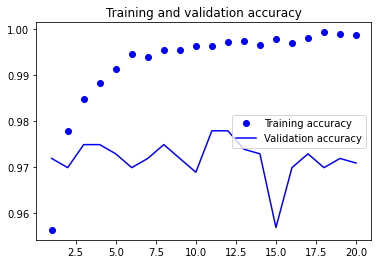

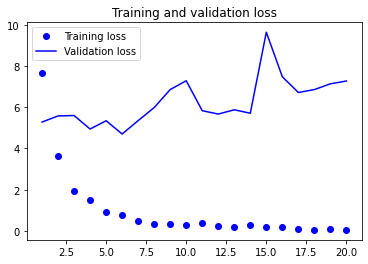

In [26]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [27]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [28]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [29]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [30]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
313/313 [==============================] - 12s 35ms/step - loss: 9.6923 - accuracy: 0.9346 - val_loss: 5.2397 - val_accuracy: 0.9679
Epoch 2/50
313/313 [==============================] - 11s 34ms/step - loss: 4.9260 - accuracy: 0.9525 - val_loss: 2.3895 - val_accuracy: 0.9749
Epoch 3/50
313/313 [==============================] - 11s 34ms/step - loss: 2.4564 - accuracy: 0.9564 - val_loss: 1.5804 - val_accuracy: 0.9729
Epoch 4/50
313/313 [==============================] - 11s 35ms/step - loss: 1.1197 - accuracy: 0.9556 - val_loss: 0.9224 - val_accuracy: 0.9689
Epoch 5/50
313/313 [==============================] - 11s 35ms/step - loss: 0.6696 - accuracy: 0.9590 - val_loss: 0.8900 - val_accuracy: 0.9639
Epoch 6/50
313/313 [==============================] - 11s 35ms/step - loss: 0.6269 - accuracy: 0.9626 - val_loss: 0.7655 - val_accuracy: 0.9699
Epoch 7/50
313/313 [==============================] - 11s 35ms/step - loss: 0.6374 - accuracy: 0.9633 - val_loss: 0.7202 - val_accuracy:

**Evaluating the model on the test set**

In [32]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.4685 - accuracy: 0.9850
Test accuracy: 0.985


### Fine-tuning a pretrained model

In [33]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [34]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [35]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 14s 39ms/step - loss: 0.7166 - accuracy: 0.9767 - val_loss: 1.6411 - val_accuracy: 0.9749
Epoch 2/30
313/313 [==============================] - 12s 38ms/step - loss: 0.4809 - accuracy: 0.9794 - val_loss: 1.8219 - val_accuracy: 0.9729
Epoch 3/30
313/313 [==============================] - 12s 38ms/step - loss: 0.4577 - accuracy: 0.9802 - val_loss: 1.4528 - val_accuracy: 0.9709
Epoch 4/30
313/313 [==============================] - 12s 38ms/step - loss: 0.2875 - accuracy: 0.9846 - val_loss: 1.2672 - val_accuracy: 0.9719
Epoch 5/30
313/313 [==============================] - 12s 38ms/step - loss: 0.2989 - accuracy: 0.9837 - val_loss: 0.9301 - val_accuracy: 0.9780
Epoch 6/30
313/313 [==============================] - 12s 38ms/step - loss: 0.2356 - accuracy: 0.9844 - val_loss: 0.9989 - val_accuracy: 0.9719
Epoch 7/30
313/313 [==============================] - 12s 39ms/step - loss: 0.2032 - accuracy: 0.9842 - val_loss: 1.1434 - val_accuracy:

In [36]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.3557 - accuracy: 0.9810
Test accuracy: 0.981


## Summary